# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [4]:
!pip install ipywidgets==8.1.5 --quiet
!pip install seaborn==0.13.2 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.5 MB/s eta 0:00:00


**Important: Restart the Kernel at this moment**

## Imports

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [12]:
# Define transforms
transforms = transforms.ToTensor()

# Create training set and define training dataloader
train_data = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transforms)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Create test set and define test dataloader
test_data = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transforms)
test_loader = DataLoader(test_data, batch_size=100)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [13]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

5


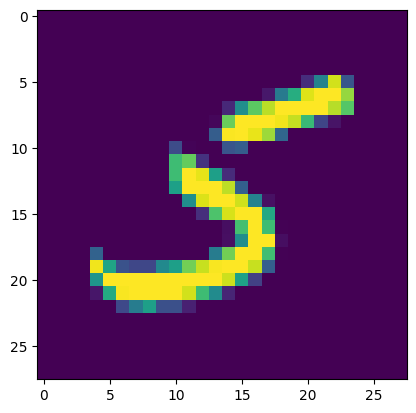

0


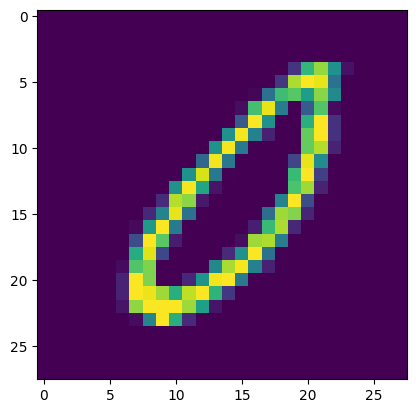

0


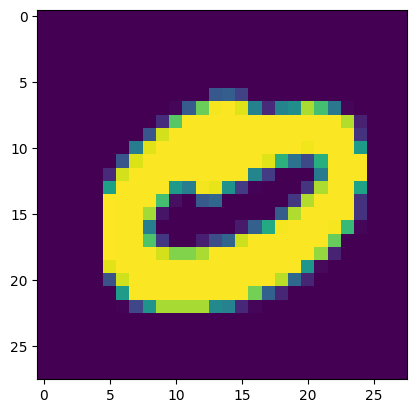

7


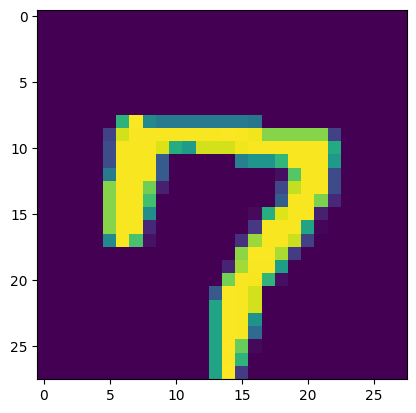

5


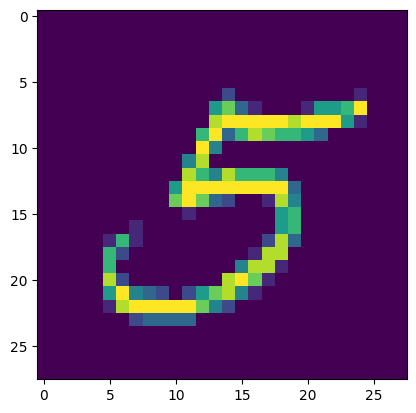

In [14]:
# Explore data
show5(train_loader)

In [15]:
# Explore data
dataiter = iter(train_loader)
images, labels = next(dataiter)

print("number of images: {}".format(images.shape))
print("number of labels: {}".format(labels.shape))

number of images: torch.Size([100, 1, 28, 28])
number of labels: torch.Size([100])


In [16]:
# Explore data
print("Number of MNIST train data examples: {}".format(len(train_data)))
print("Number of MNIST test data examples: {}".format(len(test_data)))

Number of MNIST train data examples: 60000
Number of MNIST test data examples: 10000


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [17]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(28 * 28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.layer3(x)
        return x

net = Model()

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [18]:
optimizer = optim.Adam(net.parameters(), lr=0.0005)

criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [19]:
num_epochs = 10

train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

    val_loss = 0.0
    val_correct = 0
    net.eval()
    for inputs, labels in test_loader:

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
    val_loss_history.append(val_loss/len(test_loader))

Epoch 1 training accuracy: 86.51% training loss: 0.50470
Epoch 1 validation accuracy: 92.89% validation loss: 0.25124
Epoch 2 training accuracy: 93.61% training loss: 0.22135
Epoch 2 validation accuracy: 94.45% validation loss: 0.18617
Epoch 3 training accuracy: 95.10% training loss: 0.16703
Epoch 3 validation accuracy: 95.72% validation loss: 0.14229
Epoch 4 training accuracy: 96.06% training loss: 0.13098
Epoch 4 validation accuracy: 96.27% validation loss: 0.12123
Epoch 5 training accuracy: 96.91% training loss: 0.10458
Epoch 5 validation accuracy: 96.64% validation loss: 0.10993
Epoch 6 training accuracy: 97.42% training loss: 0.08684
Epoch 6 validation accuracy: 97.10% validation loss: 0.09400
Epoch 7 training accuracy: 97.74% training loss: 0.07461
Epoch 7 validation accuracy: 97.20% validation loss: 0.08828
Epoch 8 training accuracy: 98.09% training loss: 0.06355
Epoch 8 validation accuracy: 97.49% validation loss: 0.08024
Epoch 9 training accuracy: 98.39% training loss: 0.05395

Plot the training loss (and validation loss/accuracy, if recorded).

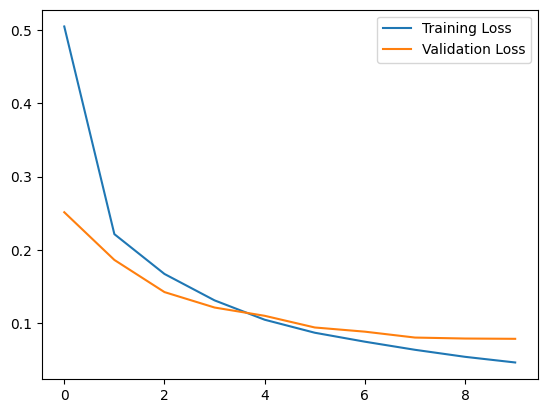

In [20]:
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [21]:
def test():
    net.eval()
    test_loss = 0
    test_correct = 0
    for i, data in enumerate(test_loader):
        inputs, labels  = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        test_correct += (preds == labels).sum().item()
        test_loss += loss.item()
    print(f'Epoch {epoch + 1} test accuracy: {test_correct/len(test_loader):.2f}% test loss: {test_loss/len(test_loader):.5f}')

In [22]:
for epoch in range(num_epochs):
    test()

Epoch 1 test accuracy: 97.25% test loss: 0.08672
Epoch 2 test accuracy: 98.24% test loss: 0.05460
Epoch 3 test accuracy: 99.11% test loss: 0.03644
Epoch 4 test accuracy: 99.39% test loss: 0.02670
Epoch 5 test accuracy: 99.62% test loss: 0.02077
Epoch 6 test accuracy: 99.77% test loss: 0.01674
Epoch 7 test accuracy: 99.88% test loss: 0.01387
Epoch 8 test accuracy: 99.95% test loss: 0.01161
Epoch 9 test accuracy: 99.97% test loss: 0.00989
Epoch 10 test accuracy: 99.97% test loss: 0.00849


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [24]:
class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(28 * 28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)

        self.dropout=nn.Dropout(0.1)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.layer3(x)
        return x

model2 = Model2()

optimizer = optim.Adam(model2.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()

In [25]:
num_epochs = 10
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    model2.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model2(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

    val_loss = 0.0
    val_correct = 0
    model2.eval()
    for inputs, labels in test_loader:

        outputs = model2(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
    val_loss_history.append(val_loss/len(test_loader))

Epoch 1 training accuracy: 89.20% training loss: 0.39064
Epoch 1 validation accuracy: 94.24% validation loss: 0.18483
Epoch 2 training accuracy: 95.15% training loss: 0.16369
Epoch 2 validation accuracy: 95.88% validation loss: 0.13234
Epoch 3 training accuracy: 96.59% training loss: 0.11265
Epoch 3 validation accuracy: 96.56% validation loss: 0.10761
Epoch 4 training accuracy: 97.35% training loss: 0.08675
Epoch 4 validation accuracy: 96.74% validation loss: 0.10495
Epoch 5 training accuracy: 97.93% training loss: 0.06798
Epoch 5 validation accuracy: 97.51% validation loss: 0.07956
Epoch 6 training accuracy: 98.28% training loss: 0.05612
Epoch 6 validation accuracy: 97.32% validation loss: 0.08896
Epoch 7 training accuracy: 98.65% training loss: 0.04448
Epoch 7 validation accuracy: 97.49% validation loss: 0.08609
Epoch 8 training accuracy: 98.81% training loss: 0.03793
Epoch 8 validation accuracy: 97.72% validation loss: 0.07752
Epoch 9 training accuracy: 99.02% training loss: 0.03198

## Saving your model
Using `torch.save`, save your model for future loading.

In [26]:
torch.save(Model, "Model.pth")
torch.save(Model2, "Model2.pth")